In [1]:
import numpy as np

In [3]:
print(np.dot(100,200))

20000


In [4]:
total_draws = 50000
chain_burn_in_period  = 1000
annealing_starting_temperature = 100
annealing_burn_in_period = 300
annealing_frequency = annealing_burn_in_period + 50
annealing_time_constant = 30
chain_starting_temperature = 1000
chain_time_constant = 50

draw = 1
temperature = 0.0

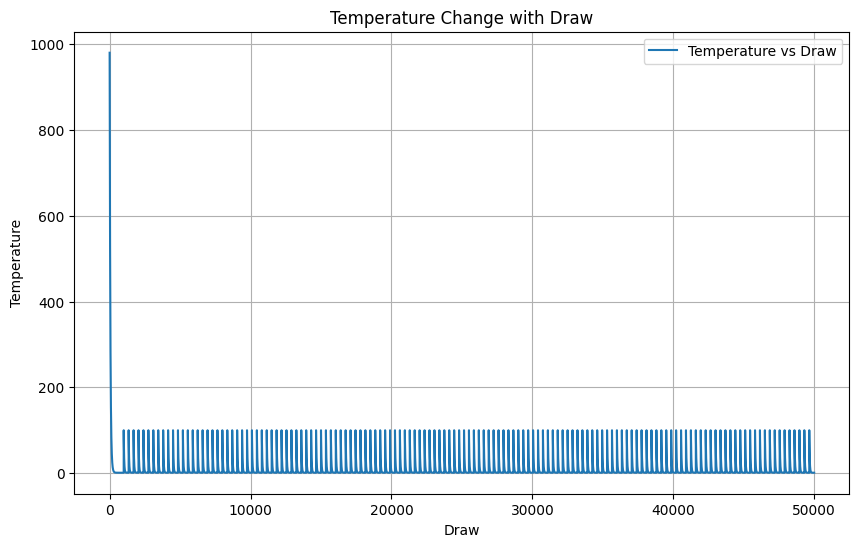

In [5]:
import matplotlib.pyplot as plt

# 初始化变量
temperatures = []
draws = range(2, total_draws)

# 计算每个 draw 对应的 temperature
for draw in draws:
    if draw > chain_burn_in_period:
        temperature = 1.0 + np.dot((annealing_starting_temperature-1.0),
                            np.exp(-((draw-chain_burn_in_period-1) % annealing_frequency)
                                   /annealing_time_constant))
    elif draw < chain_burn_in_period:
        temperature = 1.0 + np.dot((chain_starting_temperature-1.0),
                            np.exp(-((draw-1) % chain_burn_in_period)/chain_time_constant))
    temperatures.append(temperature)

# 绘制曲线
plt.figure(figsize=(10, 6))
plt.plot(draws, temperatures, label='Temperature vs Draw')
plt.xlabel('Draw')
plt.ylabel('Temperature')
plt.title('Temperature Change with Draw')
plt.legend()
plt.grid()
plt.show()